# Creating Unit Tests for PySpark Applications

**TL;DR:** Software testing, and in particular, unit testing, is a crucial step in modern Data Engineering. Pytest and unittest are great tools for developing unit tests for PySpark applications. In this article, I provide code examples using both libraries. Also, I discuss the advantages and disadvantages that each of them brings. The choice depends on your needs and previous experience.

- [1. Introduction](#1-introduction)
- [2. What is Testing in Software Development?](#2-what-is-testing-in-software-development)
  - [2.1 What are the Test Types?](#21-what-are-the-test-types)
  - [2.2 Understanding Unit Testing and Its Importance](#22-understanding-unit-testing-and-its-importance)
  - [2.3 What are the Purposes of the unittest and pytest Libraries?](#23-what-are-the-purposes-of-the-unittest-and-pytest-libraries)
  - [2.4 How Can I Execute These Tests?](#24-how-can-i-execute-these-tests)
  - [2.5 Summary and Comparison](#25-summary-and-comparison)
- [3. Conclusion](#3-conclusion)


# 1. Introduction

In this article, I will talk about how we can create unit tests for PySpark applications using Python unittest and pytest libraries. Before jumping into the topic, it makes sense to talk briefly about what testing is in Software Development, what types of tests exist, what unit testing is and why it is even needed?

# 2. What is Testing in Software Development?

Testing in software development refers to the process of evaluating and verifying that a software program or application works as intended. It’s a crucial step in the software development life cycle, ensuring that the software meets specified requirements and is free of defects or bugs that could adversely impact its performance, reliability or security.

In this article, I won’t go into details of the benefits of testing and Test Driven Development (TDD). But as a data engineer/data scientist/ML engineer (i.e., data person) you should care about the quality of the software you are building. However, I will still briefly talk about the importance of unit testing below.

# 2.1 What are the Test Types?

There are numerous types of tests in software development, each designed for a specific purpose and stage in the development process. The most commonly implemented test types are \[1\]:

-   **Unit Testing**: These are the smallest tests which validate that an individual component (e.g., function) of the software works as intended. That’s why it is expected to run the unit tests in the Continuous Integration (CI) pipeline such as after each commit or when a PR is opened depending on your DevOps workflow.
-   **Integration Testing**: These tests check if multiple components work well together. The number of integration tests is less than unit tests but higher than E2E tests. They also take longer to execute than unit tests but take less time than E2E tests. Integration tests can also be included in the CI pipeline (e.g., when PR opened into develop and/or master). Since the decision of when to run which test and which branch strategy to use are DevOps-related topics, I won’t dive into this topic for now.
-   **End-to-End Testing**: Checks the application flow from beginning to end making sure that everything works well. This is very costly and most of the time done manually (especially at the beginning of the development) in the data engineering world. It is also possible to automate E2E tests but the execution time will still be much longer than other types of tests. Be aware that, in the Web and Mobile Development contexts E2E testing is different where the goal is to simulate real user actions using various tools.



Pyramid illustrating the hierarchy of test types by volume and their increasing execution time from base to apex

In the pyramid above, as we move toward the apex, the time to execute a test increases, while closer to the base there is an expectation to implement a larger number of tests.

It is important to note that there are other testing methods such as smoke test, performance testing and so on. However, we will focus solely on unit testing today. Otherwise, this post could become a book.

# 2.2 Understanding Unit Testing and Its Importance

Unit testing is one of the foundational aspects of software development. At its core, a unit test is a piece of code written to test a specific function or module in isolation from other parts of the application. The primary goal is to validate each unit (e.g., a function).

Several reasons underscore the significance of unit testing:

1.  **Quality Assurance**: Unit tests ensure that individual components of the application work as expected. This minimizes the chances of introducing bugs when making changes or adding new features.
2.  **Regression Detection**: As software evolves, there’s a risk that changes can inadvertently introduce errors in previously working code. Unit tests act as a safety net, catching regressions before they reach production.
3.  **Documentation**: Well-written unit tests can serve as documentation. Developers can look at the tests to understand what a particular function is supposed to do and how to use it. This is especially important when existing members leave the project and new members join. Thanks to the unittests the handover process will be much smoother.
4.  **Facilitate Refactoring**: With a solid set of unit tests in place, developers can refactor or restructure code with confidence, knowing that any regressions will be quickly identified.
5.  **Development Efficiency**: While writing tests might seem like an extra task, they actually speed up the development process in the long run. With tests in place, developers can make changes without fearing that they’ll break existing functionality. Even more importantly, thanks to a high test coverage we can sleep well at night!
6.  **Collaborative Development**: In team environments, unit tests ensure that changes made by one developer don’t inadvertently break functionality added by another.
7.  **Stakeholder Trust**: Consistent quality and reliability foster trust with stakeholders, ensuring they can depend on your analyses and pipelines.

In the context of PySpark applications, unit testing is even more critical due to the distributed nature of Spark. Errors might not be visible until the code is run on a cluster with large datasets. Even worse, the code might be running without any error or exception but it might have introduced some bugs which can only be understood by taking a deep look at the results. By writing unit tests, developers can catch and fix these issues during the development phase, ensuring that the application runs seamlessly and reliably to minimize the risks.

# 2.3 What are the Purposes of the unittest and pytest Libraries?

-   unittest is a built-in Python testing library that follows the xUnit style and provides a test framework along with test discovery \[2\].
-   pytest is a popular third-party testing library for Python that offers a flexible and concise way to write tests \[3\].

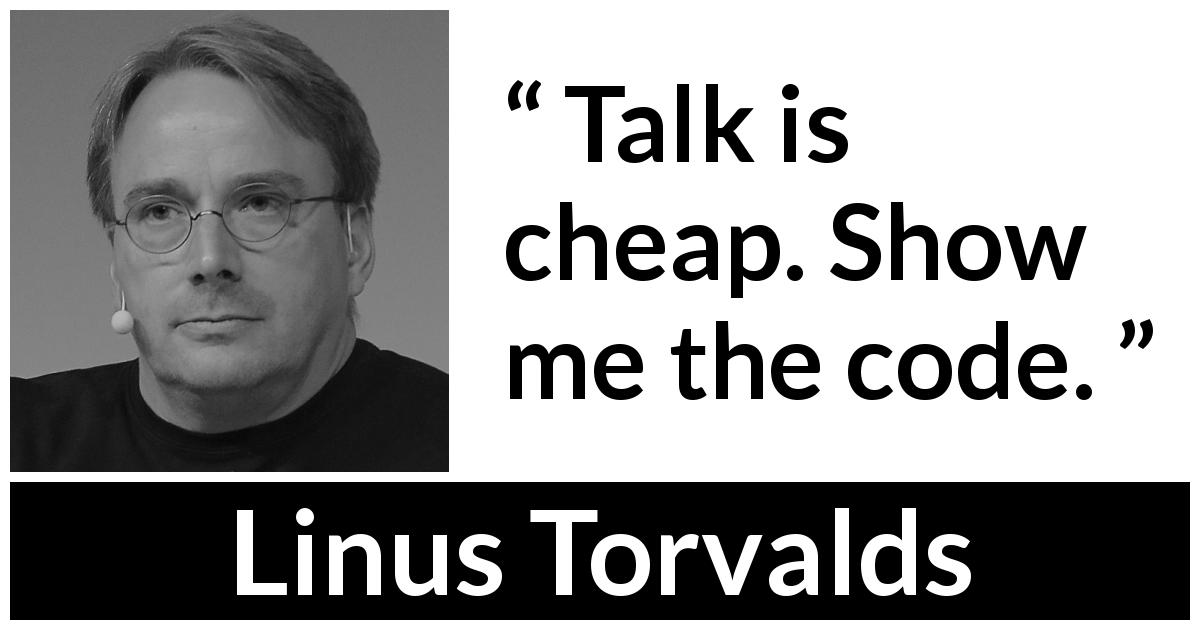


## Unit Testing Libraries (unittest and pytest)

# What makes a great test?

Ideally tests would be fast, reliable, easy to own, easy to maintain, etc. Let’s make a list that we can use when creating, improving, or evaluating our tests.

| Name | Definition | Notes |
| --- | --- | --- |
| Fast | At least 1000 test cases per second per CPU core. | No network, no disk, no sleeping. |
| Reliable | Multiple runs, with no changes, always give the same results. | No network, no race conditions, no system prerequisites. |
| Independent | Can run any 2 tests at the same time with no interference | Order independent, leaves system unchanged. |
| Diagnosable | When a test fails, it is immediately obvious why. | Tests are well-named and specific. Assertions are rich and informative. |
| Readable | A human familiar with the domain (even non-programmers) can read the test name and test body and understand why this test case matters. | Code under test must use in-domain names and expose the right level of detail. |
| Organized | If I wonder “is there a test for this requirement?” I can easily find the corresponding test case (or know that it does not exist). | May break the 1 test :: 1 class relationship |
| Does not impede refactoring | Does not depend on implementation details. Changing code in ways that doesn’t affect visible behavior is not made harder by the need to update tests. | No mocks (except for TDA.) |
| Only runs what it’s trying to test | No test helpers. No mocks. No setup that’s not about this test case. |   |
| 1 defect == 1 test failure | If I introduce a single defect, only a single test should fail | No n-tier architecture, no “core/common” code that is unowned or owned by a platform team. |
| Relevant | A passing test indicates that something of business value is correct and present in the system. A failing test tells us that something of business value is missing or broken. |   |
| Easy to write | The test framework and tooling and language and norms all make it easy to create a new test without a lot of rigamarole. |   |
